Uploading Data

In [7]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
data_dir = 'C:/Users/ilke/Documents/GitHub/Vehiclator/dataset'

In [11]:
img_size = (224, 224)
batch_size = 32

In [12]:
datagen = ImageDataGenerator(
    validation_split=0.2,  # %80 training, %20 validation
    rescale=1./255          # normalization of pixels: from 0-255 pixel to 0-1 pixel
)

In [15]:
#training function
train_data = datagen.flow_from_directory( #reads from directories (land, air, sea)
    data_dir,
    target_size=img_size, #resize pictures
    batch_size=batch_size,
    class_mode='sparse', #gives labels as integers (0,1,2) for our dataset
    subset='training', #this data is for training indicates
    shuffle=True #reads pictures after shuffling for better training
)

Found 20441 images belonging to 4 classes.


This is a data pipeline. As the training goes, model takes inputs as batch from train_data. For each batch:
X = image
Y = Label (0, 1, 2)

In [14]:
#testing function
val_data = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation',
    shuffle=True
)

Found 5109 images belonging to 4 classes.


Defining CNN Model:

This model:
Takes the image.
Extracts features (Conv2D).
Reduces dimensions (MaxPooling).
Finally, it interprets the learned features and decides on one of the 3 classes (Dense + Softmax).

In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    #Layer 1: To recognize simple things in an image, such as edges, colors, and textures.
    #32 filters, each filter 3x3, image input 224x224 pixels with rgb color
    layers.Input(shape=(224, 224, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),#max pooling for making the image smaller but preserves important information.

    #Layer 2: Recognize shapes
    #64 filters, each filter 3x3, relu applied as activation function
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)), #Takes only the largest value from 2x2 blocks.
    
    #Layer 3: To recognize more specific things like airplane engine, car wheel etc.
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    #Flattening
    layers.Flatten(), #Take 2D outputs and turn them to 1D outputs so that fully connected layers can take inputs
    #For example:  [ [1,2], [3,4] ] → [1,2,3,4]
    
    #fully connected layers (dense layers)
    layers.Dense(128, activation='relu'), #128 neurons
    layers.Dense(3, activation='softmax')  #Softmax to calculate output as percent
    #for example: [0.10, 0.85, 0.05] → %85 airplane
])


Defining how model will learn:

In [20]:
model.compile(
    optimizer='adam', #Adaptive Moment Estimation (ADAM) as algorithm
    loss='sparse_categorical_crossentropy', #loss function, sparse because discrete classes as input 0, 1, 2
    metrics=['accuracy'] #performance metric
)

Start Training:

In [23]:
history = model.fit( #history to hold loss value, accur
    train_data, #data we are using for training
    validation_data=val_data, #validate how well the model is
    epochs=4 #Model traverses dataset from the beginning for 4 times
)

Epoch 1/4
639/639 ━━━━━━━━━━━━━━━━━━━━ 323s 506ms/step - accuracy: 0.9974 - loss: 0.0101 - val_accuracy: 0.9800 - val_loss: 0.1040
Epoch 2/4
639/639 ━━━━━━━━━━━━━━━━━━━━ 321s 502ms/step - accuracy: 0.9960 - loss: 0.0121 - val_accuracy: 0.9890 - val_loss: 0.0431
Epoch 3/4
639/639 ━━━━━━━━━━━━━━━━━━━━ 318s 497ms/step - accuracy: 0.9972 - loss: 0.0085 - val_accuracy: 0.9883 - val_loss: 0.0580
Epoch 4/4
639/639 ━━━━━━━━━━━━━━━━━━━━ 316s 495ms/step - accuracy: 0.9962 - loss: 0.0108 - val_accuracy: 0.9900 - val_loss: 0.0514


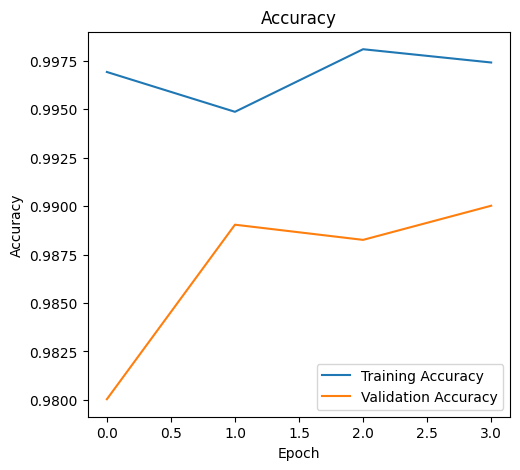

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy graph
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

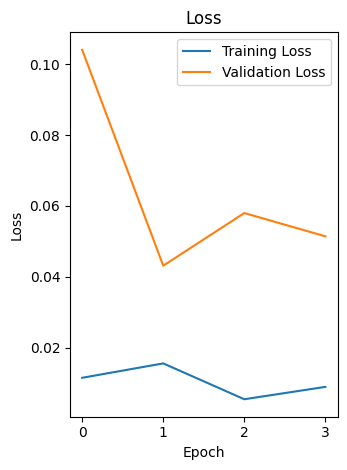

In [26]:
# Loss graph
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()